In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [46]:
def logistic_growth_controlled(y, t, params, treatment_function, cycles):
    """
    Differential equation for logistic growth with a control term for Leukemic stem cells in active 

    Args:
        y (float): Current population size.
        t (float): Current time.
        params (array float): array with parameter values.
        treatment_function : A function that takes time and cycles (t, cycle) and returns  u in {0,1}  ( 0 means no treatment and 1 treatment).
        cycles : treatment cycles 

    Returns:
        float: The rate of change of the population size (dy/dt).
    """
    control = treatment_function(t,cycles)
    p_l, K_A, d_k, c = params 
    dydt = ( p_l * (1 - y / K_A) - c*control -d_k ) * y
    return dydt

In [47]:
## This is how we read the treatment data for a patient
def treatment_cycle( patient_id ) :

    #patient_id = 104
    # read all data.  [[ Boris ]] Its inefficient to read all data here; but we can optimize this later
    chemo_data = pd.read_csv('rsif20200091_si_003.csv')
    # get treatment information from a specific patient
    chemo_row = chemo_data[chemo_data.PatientID==patient_id].iloc[0]

    chemo_start_times = [int(x) for x in chemo_row['Chemo_begin'].split()] # starting times of therapy cycle
    chemo_end_times = [int(x) for x in chemo_row['Chemo_end'].split()] #

    return   [ chemo_start_times , chemo_end_times ]    ## [[ Boris ]] we may need a better data structure here


In [48]:
# Define a control function (example: constant control after a certain time)
def treatment_function(time, cycles ):

    chemo_start_times, chemo_end_times  = cycles 

    Ncycles = len(chemo_start_times)

    for i in range(Ncycles) :
        if chemo_start_times[i] <= time <= chemo_end_times[i]  :
            return 1.0  # Apply 60% control
    
    return 0.0  # No control


## Run a Simulation

In [49]:
## Seting parameters for simulations
p_l = 0.11337807
K_A = 10000
d_k = 1/30
c = 1.2114013 

# Initial value
La_o = 10000*.10

t = np.linspace(0, 500, 501) # Time points

In [50]:
## Generate a trajectory wit patient control

# determine treatment cycles
## This is how we read the treatment data for a patient 
patient_id = 104
cycles = treatment_cycle( patient_id ) 

# names of the parameters to fit
params = [p_l, K_A, d_k, c]

results = odeint(logistic_growth_controlled, La_o , t, args=(params, treatment_function, cycles))


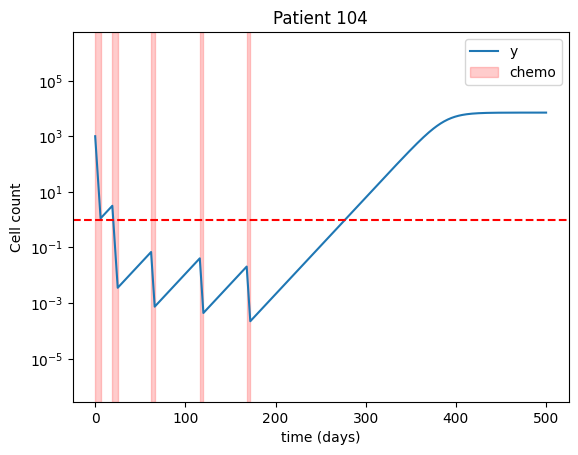

In [51]:
# plot a simple simulation
fig, ax = plt.subplots()
chemo_start_times, chemo_end_times = cycles
plt.plot(t, results, label='y')
plt.yscale('log')

for i, (start, end) in enumerate(zip(chemo_start_times, chemo_end_times)):
    label = None
    # the reason for the i=0 is so that we only have one thing in the legend, rather than a separate legend for every cycle.
    if i == 0:
        label = 'chemo'
    plt.fill_between([start, end], 0, 1, alpha=0.2, color='red',
                        label=label, transform=ax.get_xaxis_transform())
### Added This Part ###
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.title(f'Patient {patient_id}')
plt.xlabel('time (days)')
plt.ylabel('Cell count')
plt.legend()
plt.show()

In [53]:
# determine treatment cycles
cycles = [ [],[] ] # we provide empty treatment cycles

# names of the parameters to fit
params = [p_l, K_A, d_k, c]
## This is how we read the treatment data for a patient

results = odeint(logistic_growth_controlled, La_o , t, args=(params, treatment_function, cycles))

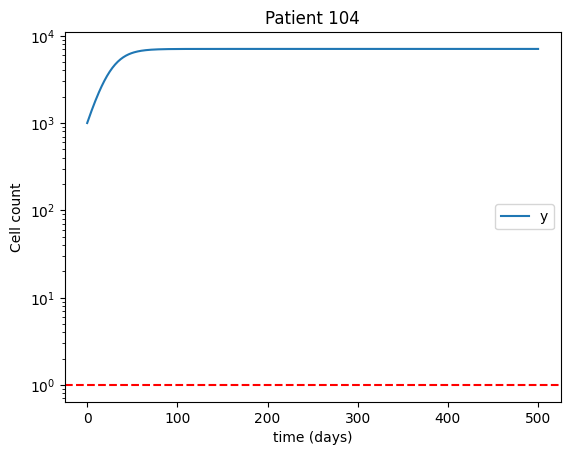

In [54]:
# plot a simple simulation
fig, ax = plt.subplots()
chemo_start_times, chemo_end_times = cycles
plt.plot(t, results, label='y')
plt.yscale('log')

for i, (start, end) in enumerate(zip(chemo_start_times, chemo_end_times)):
    label = None
    # the reason for the i=0 is so that we only have one thing in the legend, rather than a separate legend for every cycle.
    if i == 0:
        label = 'chemo'
    plt.fill_between([start, end], 0, 1, alpha=0.2, color='red',
                        label=label, transform=ax.get_xaxis_transform())
### Added This Part ###
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.title(f'Patient {patient_id}')
plt.xlabel('time (days)')
plt.ylabel('Cell count')
plt.legend()
plt.show()